In [2]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_volume_ov,inbtou_volume_sd,inbtou_spending,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,,,
2010,831000.0,330000.0,501000.0,643100000.0,0,0,0.000000,2010
2011,823000.0,338000.0,485000.0,653800000.0,0,0,0.000000,2011
2012,742000.0,351000.0,391000.0,674700000.0,0,0,0.000000,2012
2013,733000.0,366000.0,367000.0,714000000.0,0,0,0.000000,2013
2014,747000.0,386000.0,361000.0,760600000.0,0,0,0.000000,2014
2015,909000.0,393000.0,516000.0,779200000.0,0,0,0.000000,2015
2016,1107000.0,408000.0,699000.0,794900000.0,0,0,0.000000,2016
2017,745000.0,335000.0,410000.0,639100000.0,0,0,0.000000,2017
2018,393000.0,192000.0,201000.0,567900000.0,0,0,0.000000,2018


Estimated COVID-19 effect: -445466 ± 229352 (95% confidence)


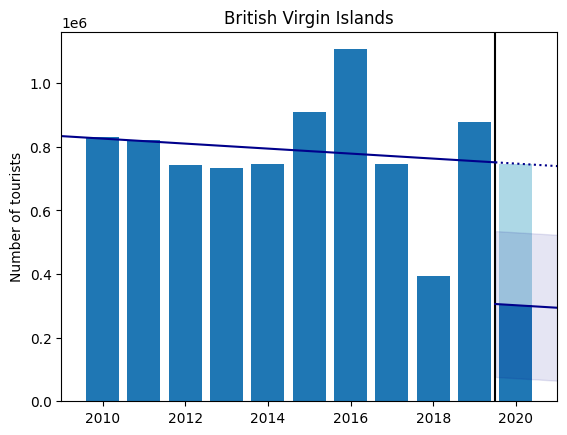

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     5.382
Date:                Thu, 27 Apr 2023   Prob (F-statistic):             0.0330
Time:                        03:15:28   Log-Likelihood:                0.27267
No. Observations:                  11   AIC:                             5.455
Df Residuals:                       8   BIC:                             6.648
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.0594     61.389      0.864

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [3]:
# Set up plot
plt.title('British Virgin Islands')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -216399 ± 73298 (95% confidence)


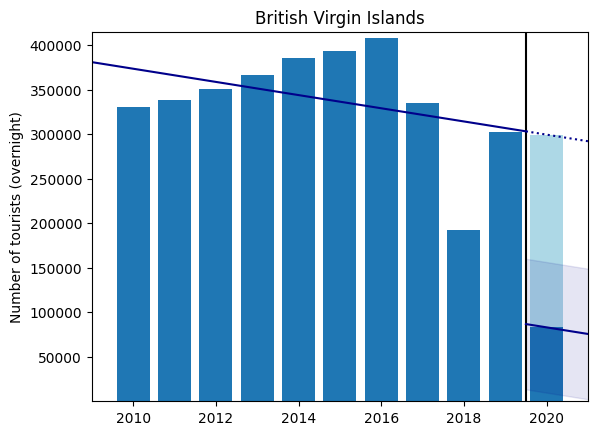

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.839
Model:                              OLS   Adj. R-squared:                  0.799
Method:                   Least Squares   F-statistic:                     20.89
Date:                  Thu, 27 Apr 2023   Prob (F-statistic):           0.000667
Time:                          03:15:29   Log-Likelihood:                 3.3568
No. Observations:                    11   AIC:                           -0.7136
Df Residuals:                         8   BIC:                            0.4801
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        69.4451  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# Set up plot
plt.title('British Virgin Islands')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2009, 2021)
plt.ylim(1, 4.15 * 10**5)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -229066 ± 175331 (95% confidence)


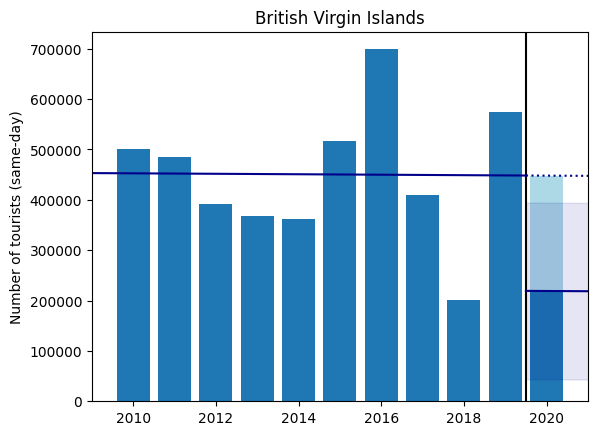

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_sd   R-squared:                       0.297
Model:                              OLS   Adj. R-squared:                  0.121
Method:                   Least Squares   F-statistic:                     1.690
Date:                  Thu, 27 Apr 2023   Prob (F-statistic):              0.244
Time:                          03:15:32   Log-Likelihood:                -2.5260
No. Observations:                    11   AIC:                             11.05
Df Residuals:                         8   BIC:                             12.25
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.2569  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
# Set up plot
plt.title('British Virgin Islands')
plt.ylabel('Number of tourists (same-day)')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume_sd'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)